In [1]:
# 당뇨병 환자의 데이터
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [4]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [5]:
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [6]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


> data는 442 개의 행과 10 개의 열로 구성된 2 차원 배열입니다.   
> target은 442 개의 요소를 가진 1차원 배열입니다.   
> 여기서 442 개를 Sample 개수라고 하며, 10 개를 특성(Feature) 개수라고 합니다.

In [7]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
# data 일부 보기, 0~2번 샘플
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [10]:
# target 일부 보기
diabetes.target[:3]

array([151.,  75., 141.])

In [11]:
# 당뇨병 데이터 시각화하기, data의 3번째 Feature와 Target
import matplotlib.pyplot as plt

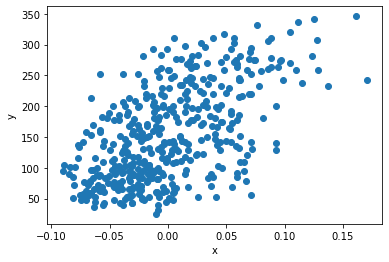

In [16]:
plt.scatter(
    diabetes.data[:, 2],
    diabetes.target
)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [17]:
# 상관계수 알아보기
import numpy as np

In [18]:
np.corrcoef(diabetes.data[:, 2], diabetes.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

> 우리만의 클라스 만들어보자

---
## 경사 하강법
: 경사 하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

# 예측값과 변화율
### 예측값(y^)
: 예측값은 하나의 모델에서 수식의 결과로 나온 값을 의미한다.   

### 훈련데이터에서 잘 맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정한다.   
2. x에서 샘플 하나를 선택하여 y^을 계산한다.
3. y^과 선택한 샘플의 진짜 y를 비교한다. (예측한 값과 정답 비교하기 : 오차 구하기)
4. y^이 y와 가까워지도록 w, b를 조정한다. (모델 조정하기 : 학습하기)
5. 모든 샘플을 처리할 때까지 2~4 항목을 반복한다.

In [24]:
# 훈련데이터의 Feature, Target 정하기
x = diabetes.data[:,2]
y = diabetes.target

# 5개 출력하기
print(x[:5], y[:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469] [151.  75. 141. 206. 135.]


In [25]:
# w와 b를 초기화하기 : 임의로 weight와 bias를 1로 선택
w = 1.0
b = 1.0

In [26]:
# 훈련데이터의 첫번째 Sample 데이터로 y^ 계산하기
y_hat = x[0] * w + b
y_hat

1.0616962065186886

In [27]:
# Target과 예측데이터 비교하기
print(y_hat)
print(y[0])

1.0616962065186886
151.0


> 당연한 결과지만, Target과 예측값이 너무 많은 차이가 발생한다.

### w값 조정하기
: w와 b를 조금씩 조정해서 y_hat이 증가, 감소하는지 살펴보기

In [28]:
# 기존 w에 0.1만 증가해보기
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705574

> y_hat보다 살짝 오름, Target에 근접해가는 중

In [32]:
# w값 조정한 후 예측값 변화율 확인하기
# w가 0.1 증가하면 y_hat이 얼마나 증가했는지 계산하기
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.061696206518688734

> x[0]과 같은 값이다.

In [33]:
# 0.1로 해서 그런가? 0.2로 바꿔서 계산해보자
w_inc = w + 0.2
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868769

> 여전히 x[0]과 같음

In [38]:
# 훈련데이터의 2번째 값(음수)로 테스트해보자
y_hat = x[1] * w + b
w_inc = w + 0.1
y_hat_inc = w_inc * x[1] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
(w_rate)

-0.05147406123880644

> x[1]과 같다.

w_rate    
= (y_hat_inc - y_hat) / (w_inc - w)    
= {(x[0] * w_inc + b) - (x[0] * w + b)} / (w_inc - w)   
= x[0](w + 0.1 - w) / (w + 0.1 - w)   
= x[0]   

> w_rate : gradiant(경사)

In [40]:
# 변화율에 대한 증명이 끝났으니 다시 훈련데이터 1번 값으로 변화율을 구해보자
w = b = 1
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.061696206518688734

In [41]:
# 변화율로 가중치를 업데이트 하기(학습하기)
w_new = w + w_rate
w_new

1.0616962065186888

In [42]:
# 변화율로 절편 업데이트하기(학습하기)
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


b_rate   
= (y_hat_inc - y_hat) / (b_inc - b)   
= {(w_inc * x[0] + b) - (x[0] * w + b)} / (b + 0.1 - b)   
= (x[0](w + 0.1 - w)) / 0.1   
= x[0]

In [44]:
# 오차 역전파로 가중치와 절편을 업데이트합니다. 손실함수(비용함수)를 구성합니다.
# 오차 역전파(backpropagation)는 y^와 y의 차이를 이용하여 w와 b를 업데이트합니다.
# 오차와 변화율을 곱하여 가중치 업데이트하기

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [46]:
# 2번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.122032764040299 75.7274477824319


In [47]:
# 반복문을 통한 전체 샘플을 반복하기

w = b = 1
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)

587.8654539985689 99.40935564531424


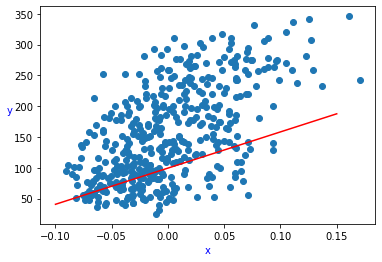

In [54]:
# 그래프로 확인해보자
plt.scatter(x, y)

# 산포도에서 x축 범위 : -0.1 ~ 0.15
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    'r' # color
)

plt.xlabel('x', color='blue')
plt.ylabel('y', rotation=0, color='blue')

plt.show()

In [56]:
# Epoch로 반복하기 : w와 b를 반복적으로 계산해보기

w=b=1
for _ in range(100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + b_rate * err

print(w, b)

913.5973364345905 123.39414383177204


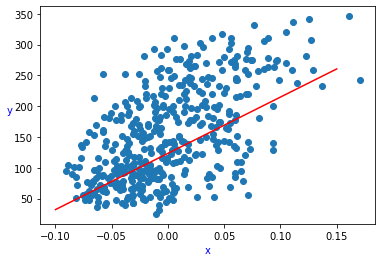

In [57]:
# 그래프로 확인해보자
plt.scatter(x, y)

# 산포도에서 x축 범위 : -0.1 ~ 0.15
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    'r' # color
)

plt.xlabel('x', color='blue')
plt.ylabel('y', rotation=0, color='blue')

plt.show()

> 그래프가 y축 방향으로 올라갔다.   
> Epoch로 y절편과 기울기 모두 상승했기 때문   
> y^ = 913.5973364345905 * x + 123.39414383177204

In [58]:
# 모델로 예측해보기
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643899983

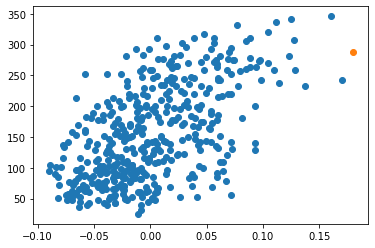

In [60]:
plt.scatter(x, y)

plt.scatter(x_new, y_pred)

plt.show()

---
# 모델만들기 정리
1. w와 b를 임의의 값(1,1)로 초기화하고 훈련데이터 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다.
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고, 이 값을 이용하여 w와 b를 업데이트한다. (학습)
3. 만약 y^이 y보다 커지면 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트된다.
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 자동으로 w와 b가 커지는 방향으로 업데이트된다.

# 선형회귀를 위한 Class 만들기

In [61]:
class LRModel:
    # 초기화 작업
    def __init__(self):
        self.w = 1.0 # 가중치를 초기화
        self.b = 1.0 # 절편을 초기화

    # 정방형 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b # 직선 방정식
        return y_hat

    # 역방향 계산
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그래디언트 계산
        b_grad = 1 * err
        return w_grad, b_grad

    # 훈련
    def fit(self, x, y, epoch):
        for _ in range(epoch):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = (y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b


In [62]:
lrmodel = LRModel()

In [63]:
w, b = lrmodel.fit(x, y, 100)
print(w, b)

913.5973364345905 123.39414383177204


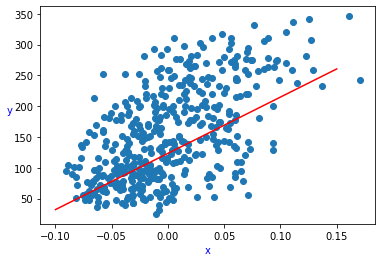

In [64]:
# 그래프로 확인해보자
plt.scatter(x, y)

# 산포도에서 x축 범위 : -0.1 ~ 0.15
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    'r' # color
)

plt.xlabel('x', color='blue')
plt.ylabel('y', rotation=0, color='blue')

plt.show()

---
# 용어 정리
### 선형회귀
선형방정식을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있습니다.   
머신러닝 알고리즘이지만 딥러닝에서 사용하는 인공신경망 알고리즘의 기초가 됩니다.

### 경사 하강법
최적화 알고리즘 중의 하나로, 핵심 훈련 알고리즘입니다.   
이 방법은 최적의 모델을 만드는 가중치를 한번에 찾지 않고,   
먼저 임의로 정한 가중치에서 출력을 만든 후 타깃과 비교하여 오차를 줄이는 방향으로 가중치를 조정합니다.   
이런 과정의 모든 훈련샘플에 대해서 반복하면서 최적의 가중치를 찾습니다.   

### 손실함수
모델이 얼마만큼의 오류가 있는지 측정하는 기준입니다.   
손실함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적입니다.   
다른 말로는 비용함수, 목적함수라고도 부릅니다.   